# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests, json


### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

In [1]:
REST_API_KEY = '05f8388b3a7a5adbec1dafcd7dd3deca'

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

In [2]:
# document 에서 URL 얻기
url = 'https://api.kakaobrain.com/v1/inference/kogpt/generation'

In [12]:
# request(URL) -> response : json(str)
prompt ='원자폭탄을 개발한 사람은' # 제시어
max_tokens = 50 # 글자수
params = {'prompt':prompt, 'max_tokens':max_tokens, 'n':2} 
headers = {
    "Authorization": f'KakaoAK {REST_API_KEY}',
    "Content-Type": "application/json"
}

response = requests.post(url, json.dumps(params), headers=headers)

In [7]:
# json.dumps() : 문자열 인코딩, 한글은 인터넷상에서 사용 X, 한글 -> 영문, 특수문자로 인코딩
json.dumps(params)

'{"prompt": "\\uc6d0\\uc790\\ud3ed\\ud0c4\\uc744 \\uac1c\\ubc1c\\ud55c \\uc0ac\\ub78c\\uc740", "max_tokens": 50}'

In [10]:
# json(str) -> parsing : text
response.json()

{'id': 'b07c39ec-8276-4ed4-b56d-eb36ec10b1a7',
 'generations': [{'text': ' 누구나 아인슈타인이라는 이름을 들어보았을 것이다. 나아가 사람들에게 알려진 가장 나쁜 천재의 하나로 DNA를 연구해 새로운 항생제 등 약품을 만드는 C.T 몬산토가 꼽힌다. < 생각 > - 천재도',
   'tokens': 50}],
 'usage': {'prompt_tokens': 7, 'generated_tokens': 50, 'total_tokens': 57}}

In [13]:
texts = response.json()['generations']
texts = [text['text'] for text in texts]
texts

[' 오펜하이머 박사인데 그는 유대인이었어요. \u200b 그런 연고로 해서 미국 안에 있던 과학자들이나 발명가들이 거의 다 유대계라는 것이지요.. 그런데 한편으론 특별히 하버드 대학 같은데서 물리학자가 많이 나올 때 그것',
 ' 오펜하이머 박사였습니다. 그는 원자탄은 살상용이 아니라 전쟁 종식을 위한 공포예방용의 무기여야함에도, 세계 곳곳에서 핵문제로 긴장과 혼란이 계속되고 있는데 한 나라라도 이기면 지금 당장이라도']

#### 1. 다음문장 만들기

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

#### 5. 응용하기

## 1-3 Karlo

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import urllib
import json
from PIL import Image

In [24]:
# 칼로는 이미지를 Base64 인코딩한 문자열 값으로 처리
def stringToImage(base64_string, mode='RGBA'):
    imgdata = base64.b64decode(str(base64_string))
    img = Image.open(io.BytesIO(imgdata)).convert(mode)
    return img

def create_image(prompt, nag):
    # key 
    REST_API_KEY = 'bcadb76a9696397f26e9122b3f32f53b'
    # url
    url = 'https://api.kakaobrain.com/v2/inference/karlo/t2i'

    param = {'version':'v2.1', 'prompt':prompt,'negative_prompt':nag, 'width':1024, 'height':512}
    headers={
        'Authorization': f'KakaoAK {REST_API_KEY}',
        'Content-Type' : 'application/json'
    }
    # request
    response = requests.post(url, json = param, headers=headers)
    return response

def show_image(prompt, nag=''):
    response = create_image(prompt, nag)
    data = response.json()
    # dataframe
    df = pd.DataFrame(data['images'])
    for image in df['image']:
        # image open 하기
        result = Image.open(urllib.request.urlopen(image))
        result.show()


In [28]:
prompt = ''
show_image(prompt)

## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [7]:
# app_key 획득
CLIENT_ID = 'wCGr7ddnN6umWobVmWUU'
CLIENT_SECRET ='XeKEh7un5V'
# document 에서 url 획득
def get_statistics(keywords,start_date='2016-01-01', end_date='2024-03-01',timeUnit = 'month'):
    url = 'https://openapi.naver.com/v1/datalab/search'
    params = {
        'startDate':start_date,
        'endDate':end_date,
        'timeUnit':timeUnit,
        'keywordGroups':
        [{'groupName':keyword['name'] , 'keywords':keyword['keywords']} for keyword in keywords]
    }
    headers={
        'X-Naver-Client-Id': CLIENT_ID,
        'X-Naver-Client-Secret': CLIENT_SECRET,
        'Content-Type': 'application/json'
    }
    response = requests.post(url,json.dumps(params), headers=headers)
    return response
keywords = [{'name':'페이스북','keywords':['페이스북','페북','facebook']},
    {'name':'트위터','keywords':['트위터','트윗','twitter']},
    {'name':'인스타그램','keywords':['인스타그램','인스타','instagram']}]

# request -> response
data = get_statistics(keywords = keywords).json()
# json(str) -> Dataframe


In [8]:
data['results'][:1]

[{'title': '페이스북',
  'keywords': ['페이스북', '페북', 'facebook'],
  'data': [{'period': '2016-01-01', 'ratio': 44.95624},
   {'period': '2016-02-01', 'ratio': 43.92873},
   {'period': '2016-03-01', 'ratio': 46.22714},
   {'period': '2016-04-01', 'ratio': 48.63285},
   {'period': '2016-05-01', 'ratio': 48.63012},
   {'period': '2016-06-01', 'ratio': 49.85759},
   {'period': '2016-07-01', 'ratio': 48.26654},
   {'period': '2016-08-01', 'ratio': 98.97838},
   {'period': '2016-09-01', 'ratio': 98.48049},
   {'period': '2016-10-01', 'ratio': 100},
   {'period': '2016-11-01', 'ratio': 94.35108},
   {'period': '2016-12-01', 'ratio': 94.96751},
   {'period': '2017-01-01', 'ratio': 89.7061},
   {'period': '2017-02-01', 'ratio': 82.77214},
   {'period': '2017-03-01', 'ratio': 91.11216},
   {'period': '2017-04-01', 'ratio': 97.52081},
   {'period': '2017-05-01', 'ratio': 95.69438},
   {'period': '2017-06-01', 'ratio': 91.68845},
   {'period': '2017-07-01', 'ratio': 88.10236},
   {'period': '2017-08-01

In [9]:
dfs = []
for row in data['results']:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title']
    dfs.append(df)
len(dfs)

3

In [10]:
dfs

[        period     ratio title
 0   2016-01-01  44.95624  페이스북
 1   2016-02-01  43.92873  페이스북
 2   2016-03-01  46.22714  페이스북
 3   2016-04-01  48.63285  페이스북
 4   2016-05-01  48.63012  페이스북
 ..         ...       ...   ...
 94  2023-11-01   6.50347  페이스북
 95  2023-12-01   6.60003  페이스북
 96  2024-01-01   6.66549  페이스북
 97  2024-02-01   6.01122  페이스북
 98  2024-03-01   1.87030  페이스북
 
 [99 rows x 3 columns],
         period     ratio title
 0   2016-01-01   4.64178   트위터
 1   2016-02-01   4.13973   트위터
 2   2016-03-01   4.16502   트위터
 3   2016-04-01   4.17578   트위터
 4   2016-05-01   4.20467   트위터
 ..         ...       ...   ...
 94  2023-11-01  14.75060   트위터
 95  2023-12-01  14.81632   트위터
 96  2024-01-01  15.34682   트위터
 97  2024-02-01  14.71164   트위터
 98  2024-03-01   3.27179   트위터
 
 [99 rows x 3 columns],
         period     ratio  title
 0   2016-01-01   6.20160  인스타그램
 1   2016-02-01   5.99155  인스타그램
 2   2016-03-01   6.38642  인스타그램
 3   2016-04-01   7.45768  인스타그램
 4   2016-05-01

In [11]:
# 세 개 합치기
merged_data = pd.concat(dfs, axis=0)
merged_data.head()

,period,ratio,title
0,2016-01-01,44.95624,페이스북
1,2016-02-01,43.92873,페이스북
2,2016-03-01,46.22714,페이스북
3,2016-04-01,48.63285,페이스북
4,2016-05-01,48.63012,페이스북


In [12]:
# pivot
pivot_df = merged_data.pivot(index='period', columns='title', values= 'ratio')
pivot_df

title,인스타그램,트위터,페이스북
period,,,
2016-01-01,6.20160,4.64178,44.95624
2016-02-01,5.99155,4.13973,43.92873
2016-03-01,6.38642,4.16502,46.22714
2016-04-01,7.45768,4.17578,48.63285
2016-05-01,8.20541,4.20467,48.63012
...,...,...,...
2023-11-01,14.97209,14.75060,6.50347
2023-12-01,14.14820,14.81632,6.60003
2024-01-01,14.17090,15.34682,6.66549


## 시각화

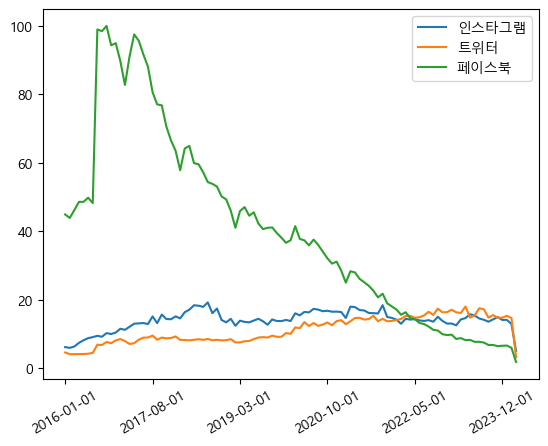

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.plot(pivot_df, label=pivot_df.columns)
plt.xticks(range(0,len(pivot_df), int(len(pivot_df)/5)), rotation=30)

plt.legend()

In [14]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, *, minor=False, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    minor : bool, default: False
        If ``False``, get/set the major ticks/labels; if ``True``, the minor
        ticks/labels.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e